In [49]:
Registration_Number = "22011103064"
Name = "Virgina Benadi F"
# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)
print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)


My name is Virgina Benadi F and my roll no : 22011103064
Computer IP Address is: 10.123.116.191


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people 
import os
import cv2
from sklearn.decomposition import PCA, IncrementalPCA

### Experiment 1 : k-means clustering of IRIS dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

c:\Users\virgb\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


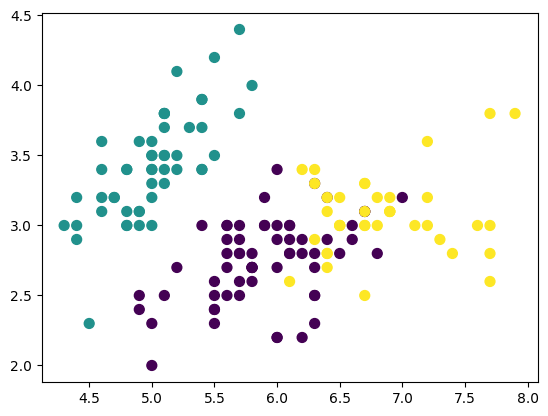

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

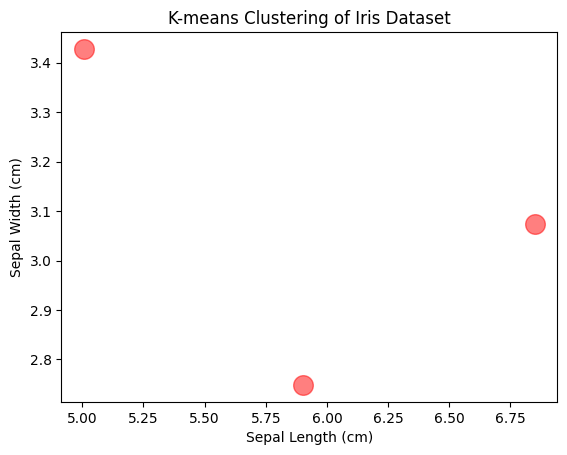

In [5]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.show()

### Experiment 2 : PCA of Housing prices dataset

In [9]:
boston = fetch_openml(data_id=531)
X = boston.data
y = boston.target
feature_names = boston.feature_names

c:\Users\virgb\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [16]:
X_pca

array([[-2.09829747,  0.77311275,  0.34294273, ..., -0.03300036,
         0.01944023,  0.36597533],
       [-1.45725167,  0.59198521, -0.69519931, ..., -0.64080983,
        -0.12579741, -0.07071949],
       [-2.07459756,  0.5996394 ,  0.1671216 , ..., -0.48755672,
         0.13332653, -0.0140218 ],
       ...,
       [-0.31236047,  1.15524644, -0.40859759, ...,  0.11565634,
         0.28196407,  0.06247358],
       [-0.27051907,  1.04136158, -0.58545406, ...,  0.0870124 ,
         0.30170082,  0.05436991],
       [-0.12580322,  0.76197805, -1.294882  , ...,  0.18432101,
         0.23273318,  0.01970872]])

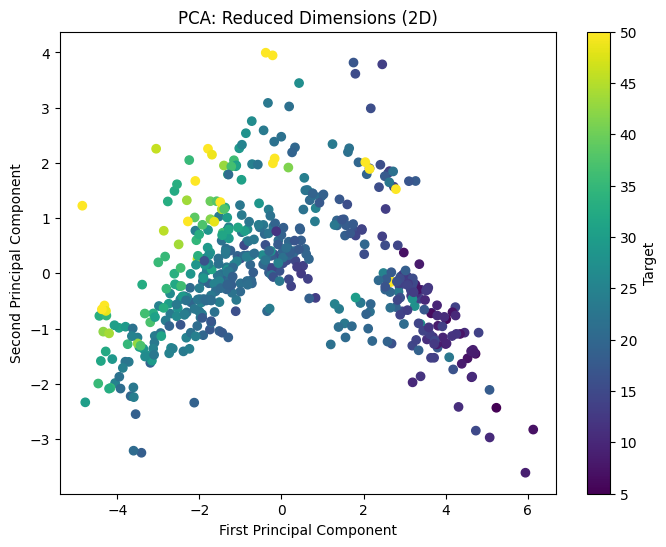

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Reduced Dimensions (2D)')
plt.colorbar(label='Target')
plt.show()

In [12]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

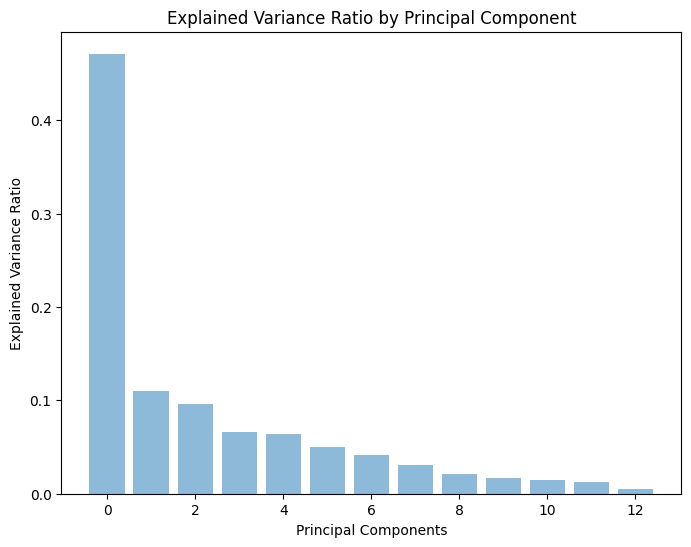

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

In [14]:
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

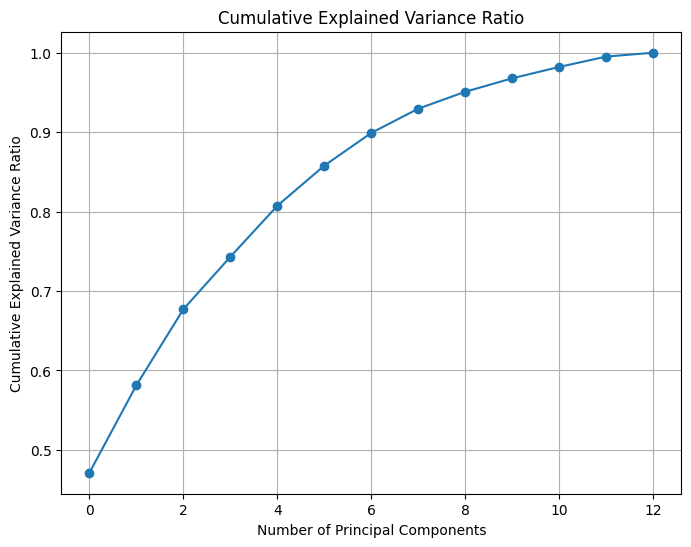

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(cumulative_explained_variance_ratio)), cumulative_explained_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

### Experiment 3 :PCA on images using scikit-learn 

##### --->PCA on preprocessed images

In [23]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [24]:
# Extract images and labels
X = lfw_people.data
y = lfw_people.target

In [27]:
X

array([[0.48366013, 0.5764706 , 0.6653595 , ..., 0.03921569, 0.03398693,
        0.02745098],
       [0.5568628 , 0.65228754, 0.6941177 , ..., 0.1124183 , 0.15686275,
        0.31111112],
       [0.19084968, 0.17124183, 0.16078432, ..., 0.20392157, 0.21176471,
        0.21960784],
       ...,
       [0.303268  , 0.30588236, 0.31895426, ..., 0.4143791 , 0.2901961 ,
        0.25751635],
       [0.45359477, 0.4392157 , 0.5346405 , ..., 0.2627451 , 0.24444444,
        0.2130719 ],
       [0.26143792, 0.3647059 , 0.4405229 , ..., 0.7281046 , 0.52287585,
        0.04052288]], dtype=float32)

In [25]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X)

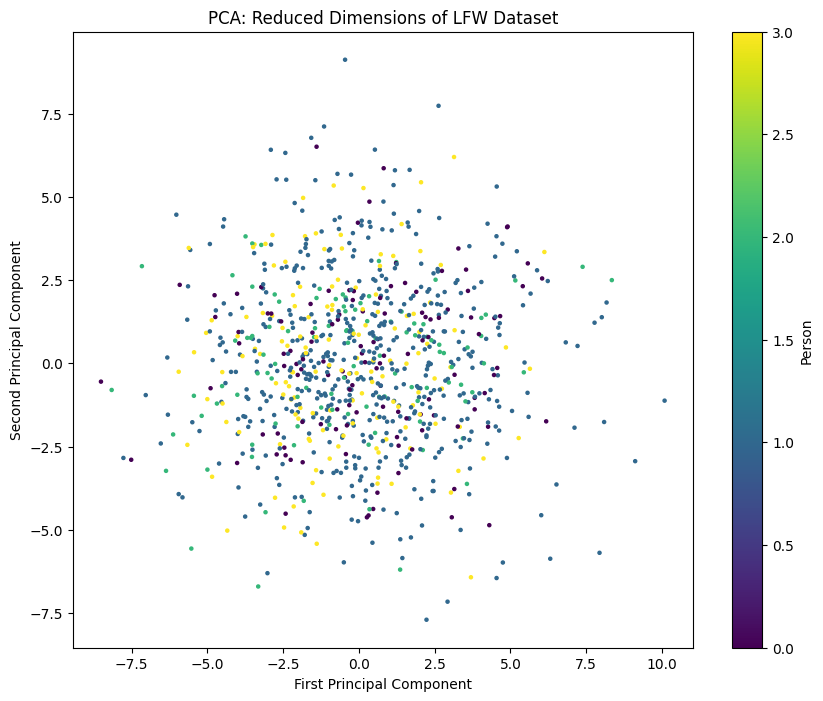

In [26]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA: Reduced Dimensions of LFW Dataset')
plt.colorbar(scatter, label='Person')
plt.show()

#### --> PCA on Raw images

In [37]:
image_folder=r'C:\Users\virgb\New\Desktop\ML\Lab\CatImages'
def load_images(folder, target_size=(300, 300)):
    image_files = sorted([os.path.join(folder, file) for file in os.listdir(folder) if file.endswith(('.jpg', '.png'))])
    images = [cv2.resize(cv2.imread(file), target_size) for file in image_files]
    return np.array(images)

# Load and resize images from the folder
images = load_images(image_folder)
print("Image shape:", images.shape)

Image shape: (11, 300, 300, 3)


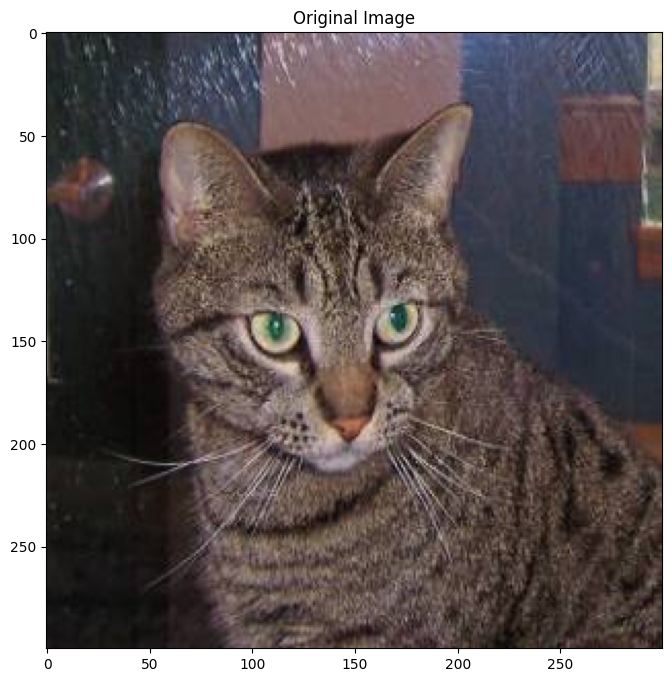

In [38]:
plt.figure(figsize=[12,8])
plt.imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))  # OpenCV reads images in BGR format, so we convert it to RGB for display
plt.title('Original Image')
plt.show()

In [39]:
images_flattened = images.reshape(images.shape[0], -1)
print("Flattened image shape:", images_flattened.shape)

Flattened image shape: (11, 270000)


In [40]:
pca = PCA()
pca.fit(images_flattened)

PCA()

In [42]:
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100
var_cumu

array([ 28.77094537,  47.055449  ,  63.38410881,  72.05094935,
        79.04388403,  84.27949425,  89.16479707,  93.34933268,
        97.47061917, 100.        , 100.        ])

In [43]:
k = np.argmax(var_cumu > 95)
print("Number of components explaining 95% variance:", k)

Number of components explaining 95% variance: 8


In [44]:
# Perform Incremental PCA
ipca = IncrementalPCA(n_components=k)
images_recon = ipca.inverse_transform(ipca.fit_transform(images_flattened))

In [46]:
# Reshape the reconstructed images
images_recon = images_recon.reshape(images.shape)
images_recon

array([[[[100.24767604, 174.33925955, 216.59628188],
         [ 96.01177858, 170.13473872, 212.40845643],
         [ 99.18209105, 173.57356692, 216.6632394 ],
         ...,
         [114.60875142, 189.72663265, 229.10494914],
         [116.80622916, 188.9194704 , 226.2382828 ],
         [117.08573535, 189.27037776, 226.35684215]],

        [[ 97.64912129, 172.07902511, 214.17759534],
         [ 93.19736549, 167.73924594, 209.77080651],
         [ 96.06939576, 170.67392778, 211.83391993],
         ...,
         [108.83356408, 184.05044216, 222.41212703],
         [112.59280295, 185.002035  , 222.22312798],
         [113.94888535, 186.28032696, 223.29268039]],

        [[ 95.87064397, 170.87295995, 212.60472735],
         [ 91.56795196, 166.50172592, 208.19257033],
         [ 94.51007818, 169.74461689, 210.56747349],
         ...,
         [111.91114626, 187.25891487, 225.49555555],
         [111.75823894, 184.6668209 , 221.54460181],
         [111.32470181, 184.13572395, 220.8658025 ]],

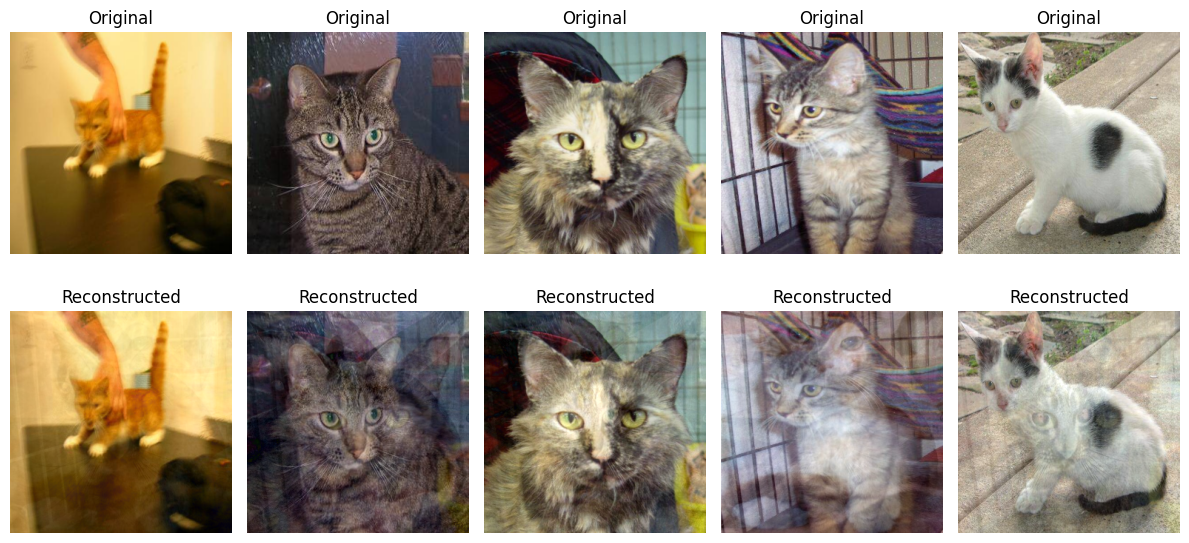

In [48]:
# Plot some of the original and reconstructed images
n_images = 5  # Number of images to plot
plt.figure(figsize=[12, 6])
for i in range(n_images):
    plt.subplot(2, n_images, i + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')

    plt.subplot(2, n_images, n_images + i + 1)
    reconstructed_image = cv2.convertScaleAbs(images_recon[i])  # Convert reconstructed image to compatible format
    plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
    plt.title('Reconstructed')
    plt.axis('off')

plt.tight_layout()
plt.show()